In [59]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import csv
import os
from PIL import Image
import random

In [2]:
# Loading attached .csv's to get basic info about dataset

#Train.csv contains information regarding each train image
df_train = pd.read_csv("https://raw.githubusercontent.com/imarekkus/Master-s_Thesis/main/dane/GTSRB/Train.csv")
#labels_train = df_train['ClassId']

#Test.csv contains information regarding each test image
df_test = pd.read_csv('https://raw.githubusercontent.com/imarekkus/Master-s_Thesis/main/dane/GTSRB/Test.csv')
#labels_test = df_test['ClassId']


df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
# Basic info about the image shape, test and training set
print("Training Set: {} samples".format(len(df_train)))
print("Test Set:     {} samples".format(len(df_test)))

Training Set: 39209 samples
Test Set:     12630 samples


In [21]:
# Unique classes
len(np.unique(df_train['ClassId']))

43

In [4]:
# Defining function to load training dataset

def readGTSRBTrain(rootpath):

    '''Function for reading GTSRB Train dataset
    Argument: path to the traffic sign data, i.e. './GTSRB/Train'
    Returns:   list of images, list of corresponding labels'''

    images = [] # images
    labels = [] # corresponding labels
    
    # loop over all 42 classes
    for c in range(0,43):

        # get path to folder for each class
        path = rootpath + '/' + str(c)

        # get the list of images in the specified folder
        images_list = os.listdir(path)

        # iterate over the list of images
        for a in images_list:
            

            try:
                
                # open each image in the list
                image = Image.open(path + '/' + a)

                # resize each image to the same size
                image = image.resize((30,30))

                # convert it into numpy array
                image = np.array(image)

                #append images and labels
                images.append(image)
                labels.append(c)

            except:

                # print error and which image it concerns
                print("ERROR loading image " + str(a))

    return images, labels


In [5]:
# Reading GTSRB train dataset

trainImages, trainLabels = readGTSRBTrain('E:/Praca Magisterska/GTSRB/Train')


In [6]:
# Reading GTSRB test dataset

def readGTSRBTest():

    '''Function for reading GTSRB Test dataset
    Arguments: none
    Returns:   list of images'''

    # reading Test.csv to get paths to test images
    df_test = pd.read_csv('https://raw.githubusercontent.com/imarekkus/Master-s_Thesis/main/dane/GTSRB/Test.csv')

    path = df_test["Path"].values

    testImages=[]

    # iterate over the list of images path from csv
    for img in path:

        try: 
            # open each image in the folder
            image = Image.open('E:/Praca Magisterska/GTSRB/'+ img)
            
            # resize each image to the same size
            image = image.resize([30, 30])

            # convert it into numpy array
            image = np.array(image)

            #append images 
            testImages.append(image)

        except:
            print("ERROR loading image " + str(img))

    return testImages


In [7]:
# Reading GTSRB train dataset

testImages = readGTSRBTest()

In [8]:
# Checking size of both lists
print("Images and labels in train data: ")
print(len(trainLabels), len(trainImages))
print("Images in test data: ")
print(len(testImages))

Images and labels in train data: 
39209 39209
Images in test data: 
12630


In [85]:
# Size of images

# Combine two columns into new one called size
df_train['Size'] = df_train['Width'].astype(str) + 'x' + df_train['Height'].astype(str)

# Getting unique values
len(np.unique(df_train['Size']))

2924

(30, 30, 3)


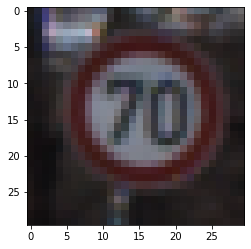

In [12]:
# Example of train image
print(trainImages[8000].shape)
plt.imshow(trainImages[8000])
plt.show()


In [58]:
# Creating table with summary of basic info
df_summary = pd.DataFrame({'Liczebność danych':['Zbiór treningowy', 'Zbiór testowy', 'Liczba klas'],
                                'Wartości':[len(trainImages), len(testImages), len(np.unique(df_train['ClassId']))]
                                })
df_summary

,Liczebność danych,Wartości
0,Zbiór treningowy,39209
1,Zbiór testowy,12630
2,Liczba klas,43


In [55]:
# Saving table to csv
#df_summary.to_csv('Podsumowanie danych.csv', encoding='utf-8-sig', index=False)

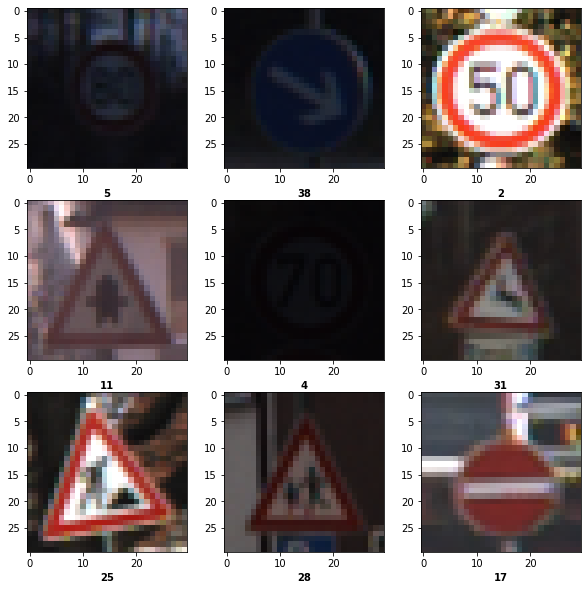

In [79]:
# Visualizing some more images

# Setting size of figure
plt.figure(figsize=(10,10))

# Setting up seed for replicability
random.seed(1)

# Loop for creating figure with images
for i in range(1,10):
    
    # Creating subplots for 10 images
    plt.subplot(3,3,i)

    # Choosing random number
    number = random.randint(0,39209)

    # Getting random image and coresponding label
    image = trainImages[number]
    label = trainLabels[number]

    # Plotting images and labels
    plt.imshow(image)
    plt.xlabel(label, fontweight='bold')

# Saving image to jpg
#plt.savefig('Images_vis.jpg', bbox_inches='tight')

In [112]:
# Balance of classes
unique_classes_train, classes_counts_train = np.unique(df_train['ClassId'], return_counts=True)

unique_classes_test, classes_counts_test = np.unique(df_test['ClassId'], return_counts=True)

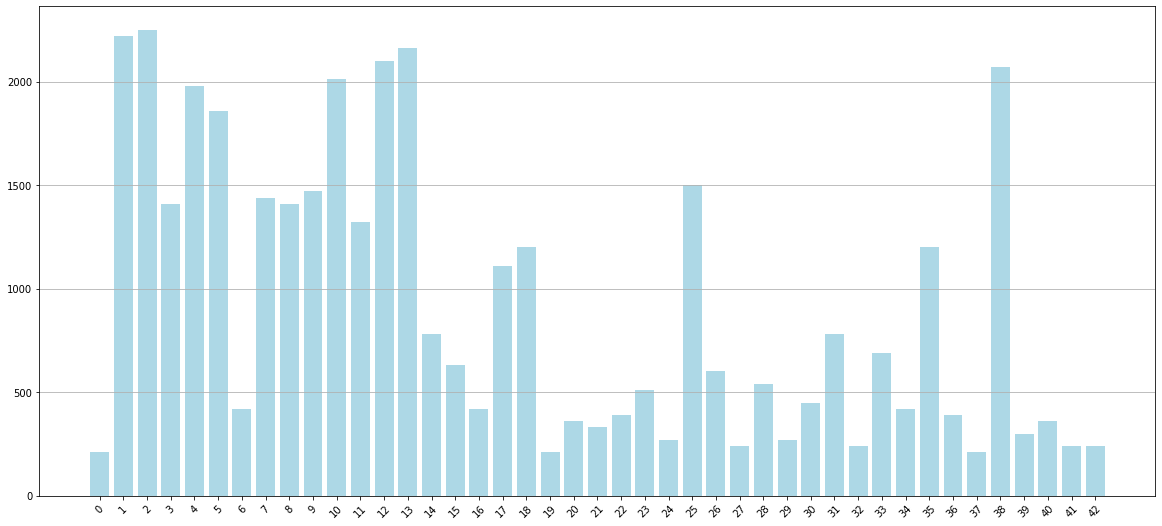

In [128]:
# Balance of classes in train set

plt.figure(figsize=(20,9))
plt.grid(axis='y')
plt.bar(unique_classes_train, classes_counts_train, color='lightblue')
plt.xticks(unique_classes_train, rotation=45)
plt.show()

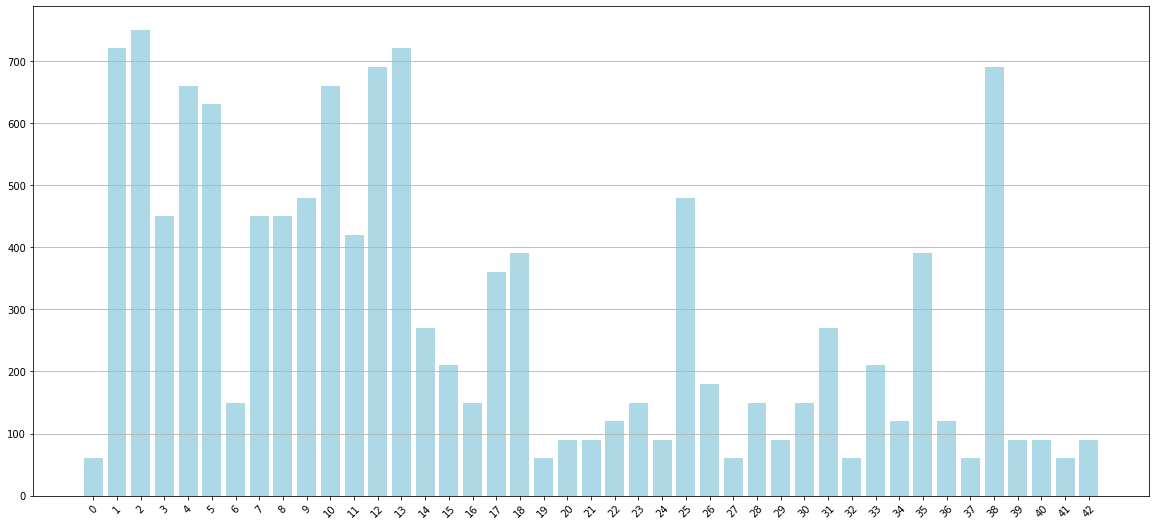

In [127]:
# Balance of classes in test set

plt.figure(figsize=(20,9))
plt.grid(axis='y')
plt.bar(unique_classes_test, classes_counts_test, color='lightblue')
plt.xticks(unique_classes_test, rotation=45)
plt.show()